In [46]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt


In [44]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self):
        velocity_noise = None
        accel = None
        cruise = None
        decel = None
        idle = None
        t_DP = None

    def subtract_avg(self, y):
        """Removes the average speed from the observations
        """
        return y - y.mean()
     

    def fnc2min(self, params, t, y):
        """ Returns the residuals for the model
        """

        A_FS = params['A_FS']
        w_FS = params['w_FS']
        gamma_FS = params['gamma_FS']

        model = A_FS * np.sin( (w_FS*t) + gamma_FS )

        return (y - model)

    def NLLSR(self, LMparams, t, yNoisy):
        """ Returns the result of the NLLSR using LMFit
        """
        LMFitmin = Minimizer(self.fnc2min, LMparams, fcn_args=(t, yNoisy))
        LMFitResult = LMFitmin.minimize(method='least_squares')
        # LSOptimResult = least_squares(self.fnc2min, InitialParams, method='lm', args=(variables, yNoisy))

        return LMFitResult





    def velocity_noise(self):
        A_FS = Symbol('A/_FS')
        print(Ai_FS)
        #EQN 5
        y_FS[t] = Sum(A_FS[i]*sin(w_FS[i][t]+gamma_FS[i]), (i, 1, 3))

        pass


In [27]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [ ]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


/Users/koeboonshyang/Documents/GitHub/MEng-V2I/DC_generator
/Users/koeboonshyang/Documents/GitHub/MEng-V2I
                timestamp  cycle_sec  timestep  speed_mph  accel_meters_ps
1002  2012-05-22 17:12:06      35535         1   4.773809         4.773809
1003  2012-05-22 17:12:07      35536         1   8.676190         3.902381
1004  2012-05-22 17:12:08      35537         1  12.981473         4.305283
1005  2012-05-22 17:12:09      35538         1  16.998809         4.017336
1006  2012-05-22 17:12:10      35539         1  20.400223         3.401414
...                   ...        ...       ...        ...              ...
1091  2012-05-22 17:13:35      35624         1  21.068858        -7.077879
1092  2012-05-22 17:13:36      35625         1  14.277404        -6.791455
1093  2012-05-22 17:13:37      35626         1   9.173529        -5.103875
1094  2012-05-22 17:13:38      35627         1   6.296846        -2.876683
1095  2012-05-22 17:13:39      35628         1   5.274187        -1.

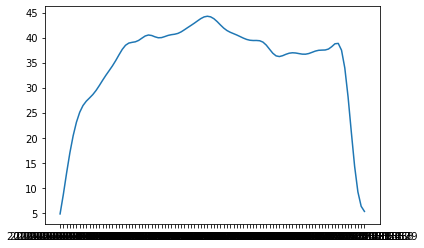

     0
0    0
1    1
2    2
3    3
4    4
..  ..
56  56
57  57
58  58
59  59
60  60

[61 rows x 1 columns]


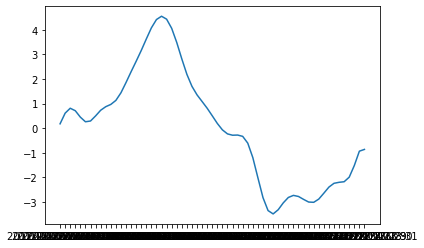

In [50]:
if __name__ == '__main__':
    LMparams = Parameters()
    LMparams.add('A_FS', value = 1.)
    LMparams.add('w_FS', value = 1.)
    LMparams.add('gamma_FS', value = 1.)

    dp_obj = DP()

    print(os.getcwd())
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    data = data.iloc[1002:1096,:]
    data.reindex()
    print(data)
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    cruising_data = data.iloc[25:86,:]
    y = dp_obj.subtract_avg(cruising_data.loc[:,'speed_mph'])
    t = pd.DataFrame(i+1 for i in range(len(cruising_data)))
    print(t)
    plt.plot(cruising_data.loc[:,'timestamp'], y)
    plt.show()